In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Underfitting Example (Depth = 1):


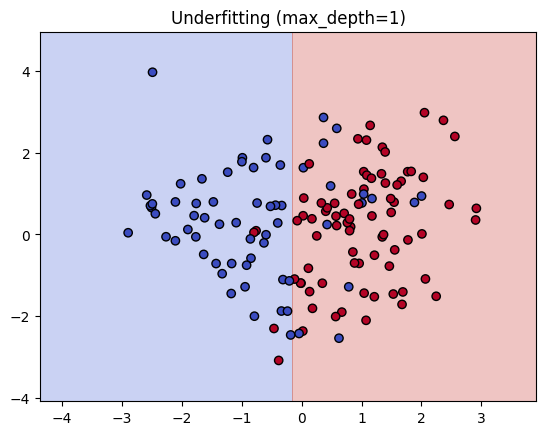

Balanced Model (Depth = 4):


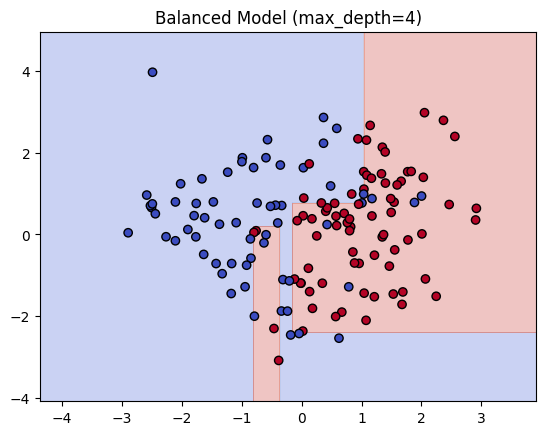

Overfitting Example (No Depth Limit):


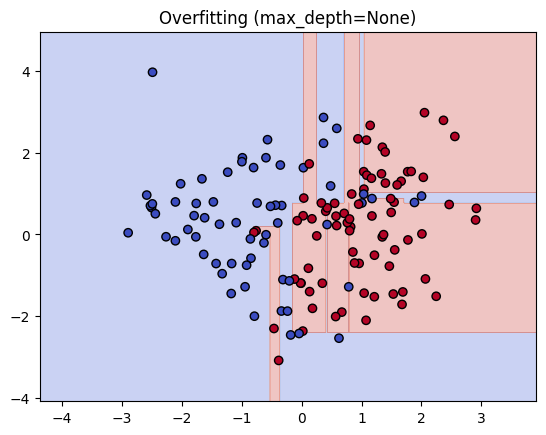

In [3]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Function to plot decision boundary
def plot_decision_boundary(max_depth, title):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title(title)
    plt.show()

# Underfitting example: max_depth=1
print("Underfitting Example (Depth = 1):")
plot_decision_boundary(max_depth=1, title="Underfitting (max_depth=1)")

# Balanced example: max_depth=4
print("Balanced Model (Depth = 4):")
plot_decision_boundary(max_depth=4, title="Balanced Model (max_depth=4)")

# Overfitting example: no depth limit
print("Overfitting Example (No Depth Limit):")
plot_decision_boundary(max_depth=None, title="Overfitting (max_depth=None)")
